In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
IMAGE_SAVE_DIR = Path(Path.cwd().parent.parent, "images")

In [2]:
playlist_file = Path(Path().cwd().parent, "data", "playlist_df.pkl")

In [3]:
raw_df = pd.read_pickle(playlist_file)

In [4]:
df = raw_df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      2417 non-null   float64
 1   energy            2417 non-null   float64
 2   key               2417 non-null   int64  
 3   loudness          2417 non-null   float64
 4   mode              2417 non-null   int64  
 5   speechiness       2417 non-null   float64
 6   acousticness      2417 non-null   float64
 7   instrumentalness  2417 non-null   float64
 8   liveness          2417 non-null   float64
 9   valence           2417 non-null   float64
 10  tempo             2417 non-null   float64
 11  type              2417 non-null   object 
 12  id                2417 non-null   object 
 13  uri               2417 non-null   object 
 14  track_href        2417 non-null   object 
 15  analysis_url      2417 non-null   object 
 16  duration_ms       2417 non-null   int64  


In [6]:
df['track_names'].nunique()

2055

In [7]:
print(f"There are {len(df)} songs in total, and {df['track_names'].nunique()} unique songs. ")

There are 2417 songs in total, and 2055 unique songs. 


In [8]:
df["playlist_name"].unique()

array(['briz party songz', 'Easy Sunday', 'Singer/Songwriter',
       'Discovered Weekly', 'Oldies', "80's Hits", '00s house party',
       'Guilty Pleasures', 'Explosive Choruses', 'Koala Kontrol', 'Chill',
       'Old Summer Stuff', 'Summer Songs', 'Summer Tunes', 'Classical',
       'Trance', 'Gym',
       'Nuggets: Original Artyfacts from the First Psychedelic Era, 1965–1968',
       'Floyd', 'The Beatles', 'Day of the Dead', "Live '72",
       'The Closing Of Winterland: December 31, 1978', 'Live/Dead',
       'Skull and Roses', '60s/70s', 'The Doors', 'Classic Rock',
       'The Only Living Boy in New York', 'Your Top Songs 2019',
       'Driving', 'Austin', 'Austin 2.0'], dtype=object)

In [9]:
df["playlist_name"].value_counts()

Classic Rock                                                             340
Discovered Weekly                                                        336
Gym                                                                      218
Summer Songs                                                             129
Summer Tunes                                                             115
80's Hits                                                                115
60s/70s                                                                  113
Chill                                                                     97
Koala Kontrol                                                             90
The Beatles                                                               77
Your Top Songs 2019                                                       73
Classical                                                                 73
Guilty Pleasures                                                          66

In [46]:
playlist_counts = df["playlist_name"].value_counts().to_frame()
playlist_counts = playlist_counts.rename(columns= {"playlist_name":"track_count"})

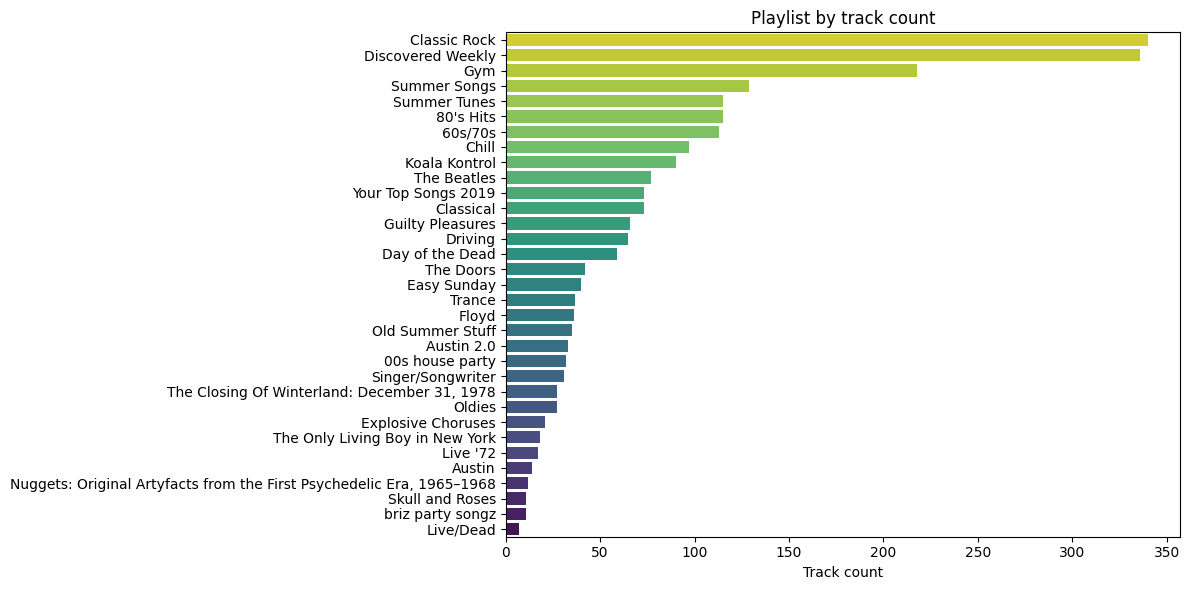

In [47]:
fig, ax = plt.subplots(figsize = (12,6))
p1 = sns.barplot(data = playlist_counts, 
                 x = playlist_counts['track_count'], 
                 y = playlist_counts.index, 
                 orient = 'h', 
                 ax = ax, 
                 palette = 'viridis_r')
ax.set_xlabel("Track count")
ax.set_title("Playlist by track count")
plt.tight_layout()
plt.savefig(Path(IMAGE_SAVE_DIR, "Playlist_track_count.png"))

In [54]:
100 * sum(playlist_counts["track_count"].nlargest(3)) / sum(playlist_counts['track_count'])

36.98800165494414

This is pretty heavily imbalanced,with 37% of the tracks being located in the 3 largest playlists. This will need to be managed during preprocessing.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      2417 non-null   float64
 1   energy            2417 non-null   float64
 2   key               2417 non-null   int64  
 3   loudness          2417 non-null   float64
 4   mode              2417 non-null   int64  
 5   speechiness       2417 non-null   float64
 6   acousticness      2417 non-null   float64
 7   instrumentalness  2417 non-null   float64
 8   liveness          2417 non-null   float64
 9   valence           2417 non-null   float64
 10  tempo             2417 non-null   float64
 11  type              2417 non-null   object 
 12  id                2417 non-null   object 
 13  uri               2417 non-null   object 
 14  track_href        2417 non-null   object 
 15  analysis_url      2417 non-null   object 
 16  duration_ms       2417 non-null   int64  


In [25]:
object_cols = df.select_dtypes(include=["object"]).columns

In [29]:
df[object_cols].nunique()

type                1
id               2132
uri              2132
track_href       2132
analysis_url     2132
artist_names     1137
track_names      2055
playlist_name      33
dtype: int64

In [10]:
df["artist_names"].value_counts().head()

The Beatles          85
Grateful Dead        80
The Doors            66
Pink Floyd           41
Simon & Garfunkel    19
Name: artist_names, dtype: int64